# ------Step 1: Data Preparation

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\forcasting gold price\Gold_data (1).csv")
df.head(10)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
5,2016-01-06,2617.70
6,2016-01-07,2903.80
7,2016-01-08,2887.80
8,2016-01-09,2813.80
9,2016-01-10,2786.80


In [3]:
# Creating lag features (e.g., using the past 5 days to predict the next day)
df['price_lag_1'] = df['price'].shift(1)
df['price_lag_2'] = df['price'].shift(2)
df['price_lag_3'] = df['price'].shift(3)
df['price_lag_4'] = df['price'].shift(4)
df['price_lag_5'] = df['price'].shift(5)

In [4]:
# Dropping any rows with NaN values (resulting from the shift)
df.dropna(inplace=True)

In [5]:
df.head(3)

,date,price,price_lag_1,price_lag_2,price_lag_3,price_lag_4,price_lag_5
5,2016-01-06,2617.7,2597.75,2577.80,2708.10,2454.5,2252.6
6,2016-01-07,2903.8,2617.70,2597.75,2577.80,2708.1,2454.5
7,2016-01-08,2887.8,2903.80,2617.70,2597.75,2577.8,2708.1


In [6]:
# Splitting the dataset into features (X) and target (y)
X = df[['price_lag_1', 'price_lag_2', 'price_lag_3', 'price_lag_4', 'price_lag_5']]
y = df['price']

In [7]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------Step 2: Model Selection and Training

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [10]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=50, random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, random_state=42)
}

In [13]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [14]:
import numpy as np
# Dictionary to store RMSE values
rmse_scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse
    print(f"{name} RMSE: {rmse}")

Linear Regression RMSE: 113.56537071293177
Ridge Regression RMSE: 113.43303440074834
Lasso Regression RMSE: 113.3680683378834
Decision Tree RMSE: 250.2097885371724
Random Forest RMSE: 147.18344048850847
Gradient Boosting RMSE: 134.76209627947486
AdaBoost Regressor RMSE: 172.15055804944976
Support Vector Regressor RMSE: 1017.2186671454698
K-Nearest Neighbors RMSE: 159.31127926170197
XGBoost Regressor RMSE: 153.2864723798278


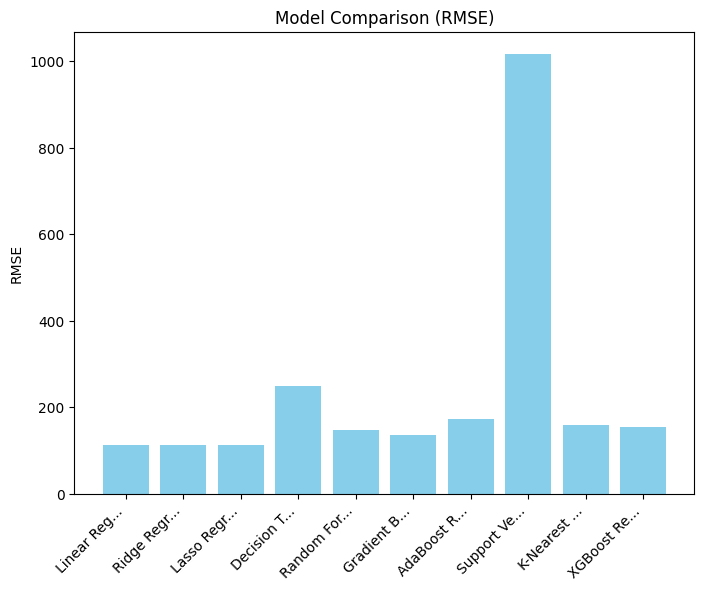

In [49]:
import matplotlib.pyplot as plt

# Optional: Display the RMSE scores in a bar chart
plt.figure(figsize=(8, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values(), color='skyblue')
plt.title('Model Comparison (RMSE)')
plt.ylabel('RMSE', rotation=90)

# Shorten the names of the models on the x-axis
shortened_labels = [label[:10] + '...' if len(label) > 10 else label for label in rmse_scores.keys()]
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xticks(ticks=range(len(shortened_labels)), labels=shortened_labels)

plt.show()


# -------Step 3: Model Evaluation

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_percentage_error

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f"{name}: MAE = {mae}, R² = {r2},MAPE = {mape * 100:.2f}%")


Linear Regression: MAE = 67.17291408753056, R² = 0.4088279274392558,MAPE = 1.59%
Ridge Regression: MAE = 67.05458170327978, R² = 0.4102048955973736,MAPE = 1.58%
Lasso Regression: MAE = 67.85925130322582, R² = 0.41088028427148515,MAPE = 1.60%
Decision Tree: MAE = 139.24288990825687, R² = -1.8696613954272672,MAPE = 3.24%
Random Forest: MAE = 98.85499770642164, R² = 0.0070212267414671015,MAPE = 2.32%
Gradient Boosting: MAE = 95.35684917098415, R² = 0.16755110797754302,MAPE = 2.25%
AdaBoost Regressor: MAE = 144.08177713312347, R² = -0.35843522127551375,MAPE = 3.34%
Support Vector Regressor: MAE = 1005.990531487259, R² = -46.42973589897128,MAPE = 23.38%
K-Nearest Neighbors: MAE = 113.79793577981647, R² = -0.16336264211418494,MAPE = 2.67%
XGBoost Regressor: MAE = 103.72546005948965, R² = -0.07703476837856882,MAPE = 2.44%


In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



In [18]:
best_model = Ridge(alpha=1.0, random_state=42) 
best_model.fit(X_train_scaled, y_train)


Ridge(random_state=42)

In [19]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

In [20]:
y_pred

array([4411.05379762, 4346.08447995, 4456.94036198, 4434.86988985,
       4484.73464455, 4447.69216334, 4457.32033154, 4453.60681947,
       4460.55994025, 4481.62550743, 4525.2566661 , 4478.80394873,
       4494.24789018, 4482.17057096, 4491.44171121, 4495.1422551 ,
       4498.14380042, 4449.43624543, 4451.1221724 , 4470.47761577,
       4477.87374973, 3558.37429346, 3693.47268197, 3831.18187034,
       4131.11131723, 4107.79958525, 4194.86394835, 4297.37982933,
       4559.43496544, 4526.12881374, 4503.97967224, 4425.80175433,
       4336.88528106, 4505.41616479, 4474.2145668 , 4509.81408752,
       4472.56056018, 4486.96222022, 4436.25428973, 4421.61757191,
       4437.019516  , 4433.17007026, 4436.64238054, 4361.5645899 ,
       4275.43029882, 4272.68245016, 4268.8427792 , 4229.8212554 ,
       4230.57063338, 4222.12149627, 4216.40709387, 3557.33332648,
       3654.05610384, 3700.53559177, 4128.46025876, 4059.57408937,
       4212.51306121, 4283.37028178, 4560.99914536, 4524.80391

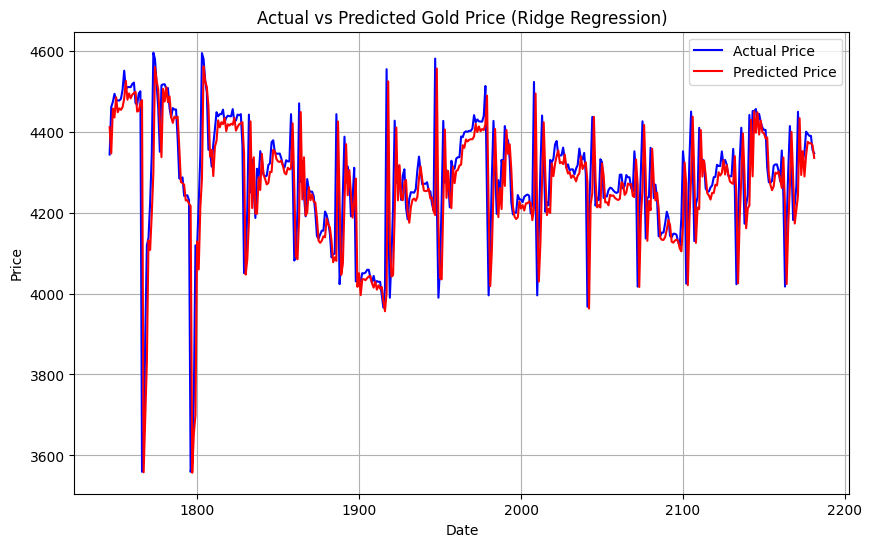

In [21]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Price', color='red')
plt.title('Actual vs Predicted Gold Price (Ridge Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("Model saved as 'ridge_model.pkl'")

y_pred = best_model.predict(X_test_scaled)

Model saved as 'ridge_model.pkl'


In [23]:
# Evaluate the model using various regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [24]:
# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2 * 100:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 67.05
Mean Squared Error (MSE): 12867.05
Root Mean Squared Error (RMSE): 113.43
R² Score: 41.02%
Mean Absolute Percentage Error (MAPE): 1.58%


In [25]:
# Evaluate the model (R², MAE, RMSE)
r2 = best_model.score(X_test_scaled, y_test)
mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Ridge Regression - R²: {r2}, MAE: {mae}, RMSE: {rmse}')

Ridge Regression - R²: 0.4102048955973736, MAE: 67.05458170327978, RMSE: 113.43303440074834


# -------1. Hyperparameter Tuning for Ridge Regression:

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [27]:
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}

In [28]:
# Use GridSearchCV for finding the best alpha
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [29]:
print(f"Best alpha for Ridge Regression: {ridge_grid.best_params_}")

Best alpha for Ridge Regression: {'alpha': 0.1}


In [30]:
# Fit the model with the best parameters
best_ridge = ridge_grid.best_estimator_
best_ridge.fit(X_train_scaled, y_train)


Ridge(alpha=0.1)

In [31]:
# Make predictions
y_pred_ridge = best_ridge.predict(X_test_scaled)


In [32]:
# Evaluate
print(f"MAE for Ridge Regression: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"RMSE for Ridge Regression: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")

MAE for Ridge Regression: 67.15848635876876
RMSE for Ridge Regression: 113.5499256175575


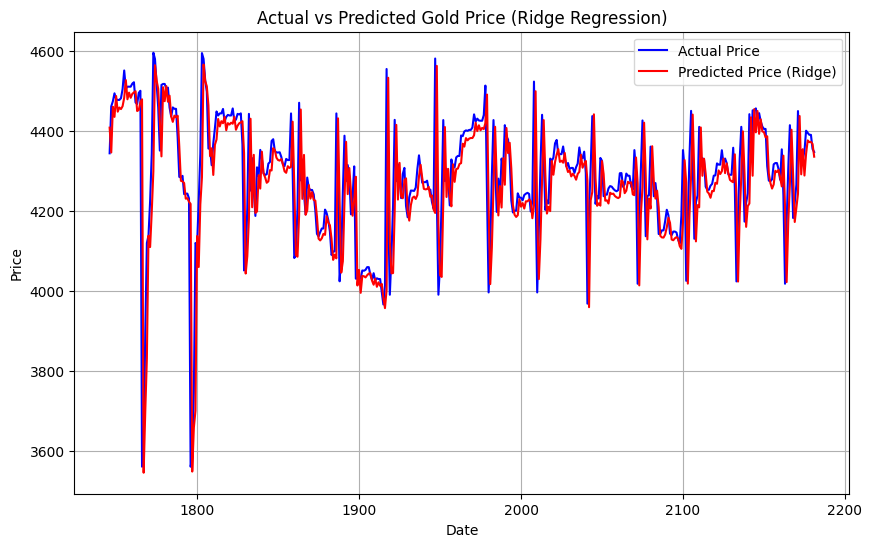

In [33]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(df.index[-len(y_test):], y_pred_ridge, label='Predicted Price (Ridge)', color='red')
plt.title('Actual vs Predicted Gold Price (Ridge Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# ---------Code for Stacking Ensemble:

In [34]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Define base models
base_models = [
    ('ridge', Ridge(alpha=1)),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

In [38]:
# Define the stacking regressor (meta-model)
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(alpha=1),  # You can also use another model here
    cv=5  # 5-fold cross-validation for base learners
)

In [39]:
# Train the stacking regressor
stacking_regressor.fit(X_train_scaled, y_train)


StackingRegressor(cv=5,
                  estimators=[('ridge', Ridge(alpha=1)),
                              ('random_forest',
                               RandomForestRegressor(random_state=42)),
                              ('gradient_boosting',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge(alpha=1))

In [40]:
# Predict on the test set
y_pred_stack = stacking_regressor.predict(X_test_scaled)


In [41]:
# Evaluate the stacked model
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))


In [42]:
print(f"Stacking MAE: {mae_stack}")
print(f"Stacking RMSE: {rmse_stack}")

Stacking MAE: 51.507838879213146
Stacking RMSE: 110.98700250609444


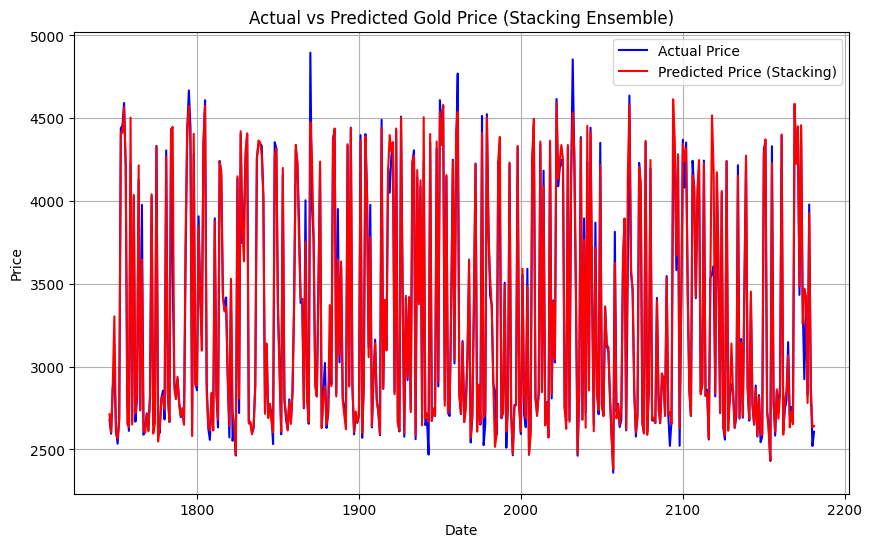

In [43]:
# Plot actual vs predicted prices for stacking model
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(df.index[-len(y_test):], y_pred_stack, label='Predicted Price (Stacking)', color='red')
plt.title('Actual vs Predicted Gold Price (Stacking Ensemble)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the accuracy results
print(f"R² Score: {r2 * 100:.2f}%")
print(f"MAPE: {mape * 100:.2f}%")

# Optional: Accuracy as (100 - MAPE)
accuracy = 100 - (mape * 100)
print(f"Model Accuracy: {accuracy:.2f}%")


R² Score: -198.56%
MAPE: 36.64%
Model Accuracy: 63.36%


In [48]:
import pickle

# Assuming `stacked_model` is your trained ensemble model
with open('stacked_model.pkl', 'wb') as f:
    pickle.dump(stacking_regressor, f)

# Save the scaler if you are using one
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
